In [1]:
import numpy as np
import matplotlib.pyplot as plt #for displaying plots
import pandas as pd
import seaborn as sns
import tensorflow as tf
import datetime
import random
import properscoring as ps
from scipy import stats


In [2]:
# setting a seed to ensure reproducability and consistency
random.seed(16)
np.random.seed(16)
tf.random.set_seed(16)

In [3]:
plt.rcParams.update({'font.size': 13})
sns.set_context("notebook", font_scale=1.3, rc={"axes.linewidth": 0.8, "lines.linewidth": 1})


In [4]:
df_train = pd.read_csv(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Daten\df_train.csv")

In [5]:
df_test = pd.read_csv(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Daten\df_test.csv")

In [6]:
#save a copy of the raw data
df_train_raw = df_train.copy()
df_test_raw = df_test.copy()

In [7]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

# Benchmarking

#### Functions

In [8]:
# Function to filter bike counts by
def filter_bike_counts_by(df, column, column_value):
    bike_counts_df = df[df[column] == column_value]
    return bike_counts_df

In [9]:
# function to create a probability distribution array (probability distribution repeated for number of observations)
def create_prob_distribution_array(array, num_observations):

    # Repeat the bike counts to create a 2D array
    bike_counts = array['bike_count'].values
    prob_distribution_2d = np.tile(bike_counts, (num_observations, 1))

    return prob_distribution_2d



In [10]:
def split_by_weekdays(df_train, df_test):
    df_train_mondays = filter_bike_counts_by(df_train, 'day_of_week', 0) #monday
    df_train_tuesdays = filter_bike_counts_by(df_train, 'day_of_week', 1) #tuesday
    df_train_wednesdays = filter_bike_counts_by(df_train, 'day_of_week', 2) #wednesday
    df_train_thursdays = filter_bike_counts_by(df_train, 'day_of_week', 3) #thursday
    df_train_fridays = filter_bike_counts_by(df_train, 'day_of_week', 4) #friday
    df_train_saturdays = filter_bike_counts_by(df_train, 'day_of_week', 5) #saturday
    df_train_sundays = filter_bike_counts_by(df_train, 'day_of_week', 6) #sunday

    df_test_mondays = filter_bike_counts_by(df_test, 'day_of_week', 0) #monday
    df_test_tuesdays = filter_bike_counts_by(df_test, 'day_of_week', 1) #tuesday
    df_test_wednesdays = filter_bike_counts_by(df_test, 'day_of_week', 2) #wednesday
    df_test_thursdays = filter_bike_counts_by(df_test, 'day_of_week', 3) #thursday
    df_test_fridays = filter_bike_counts_by(df_test, 'day_of_week', 4) #friday
    df_test_saturdays = filter_bike_counts_by(df_test, 'day_of_week', 5) #saturday
    df_test_sundays = filter_bike_counts_by(df_test, 'day_of_week', 6) #sunday

    
    return (df_train_mondays, df_test_mondays), (df_train_tuesdays, df_test_tuesdays), (df_train_wednesdays, df_test_wednesdays), (df_train_thursdays, df_test_thursdays), (df_train_fridays, df_test_fridays), (df_train_saturdays, df_test_saturdays), (df_train_sundays, df_test_sundays)

In [11]:
def split_by_workdays(df_train, df_test):

    df_train_workdays = filter_bike_counts_by(df_train, 'is_workday', 1) #workday
    df_train_non_workdays = filter_bike_counts_by(df_train, 'is_workday', 0) #non-workday

    df_test_workdays = filter_bike_counts_by(df_test, 'is_workday', 1) #workday
    df_test_non_workdays = filter_bike_counts_by(df_test, 'is_workday', 0) #non-workday

    return (df_train_workdays, df_test_workdays), (df_train_non_workdays, df_test_non_workdays)

In [12]:
def split_by_seasons(df_train, df_test):

    df_train_spring = filter_bike_counts_by(df_train, 'season', 0) #spring
    df_train_summer = filter_bike_counts_by(df_train, 'season', 1) #summer
    df_train_autumn = filter_bike_counts_by(df_train, 'season', 2) #autumn
    df_train_winter = filter_bike_counts_by(df_train, 'season', 3) #winter

    df_test_spring = filter_bike_counts_by(df_test, 'season', 0) #spring
    df_test_summer = filter_bike_counts_by(df_test, 'season', 1) #summer
    df_test_autumn = filter_bike_counts_by(df_test, 'season', 2) #autumn
    df_test_winter = filter_bike_counts_by(df_test, 'season', 3) #winter

    return (df_train_spring, df_test_spring), (df_train_summer, df_test_summer), (df_train_autumn, df_test_autumn), (df_train_winter, df_test_winter)

In [13]:
def split_by_public_holiday(df_train, df_test):
    
    df_train_ph = filter_bike_counts_by(df_train, 'public_holiday_indicator', 1) #ph
    df_train_no_ph = filter_bike_counts_by(df_train, 'public_holiday_indicator', 0) #no ph

    df_test_ph = filter_bike_counts_by(df_test, 'public_holiday_indicator', 1) #ph
    df_test_no_ph = filter_bike_counts_by(df_test, 'public_holiday_indicator', 0) #no ph

    return (df_train_ph, df_test_ph), (df_train_no_ph, df_test_no_ph)

In [14]:
def split_by_school_holiday(df_train, df_test):
    
    df_train_schoolh = filter_bike_counts_by(df_train, 'school_holiday_indicator', 1) #schoolh
    df_train_no_schoolh = filter_bike_counts_by(df_train, 'school_holiday_indicator', 0) #no schoolh

    df_test_schoolh = filter_bike_counts_by(df_test, 'school_holiday_indicator', 1) #schoolh
    df_test_no_schoolh = filter_bike_counts_by(df_test, 'school_holiday_indicator', 0) #no schoolh

    return (df_train_schoolh, df_test_schoolh), (df_train_no_schoolh, df_test_no_schoolh)

In [15]:
def split_by_rain_indic(df_train, df_test):
    
    df_train_rain = filter_bike_counts_by(df_train, 'precip_indic', 1) #rain
    df_train_no_rain = filter_bike_counts_by(df_train, 'precip_indic', 0) #no rain

    df_test_rain = filter_bike_counts_by(df_test, 'precip_indic', 1) #rain
    df_test_no_rain = filter_bike_counts_by(df_test, 'precip_indic', 0) #no rain

    return (df_train_rain, df_test_rain), (df_train_no_rain, df_test_no_rain)

In [16]:
def split_by_temperature(df_train, df_test):
    df_train_cold = df_train[df_train['temperature'] < 10]
    df_train_mild = df_train[(df_train['temperature'] >= 10) & (df_train['temperature'] < 20)]
    df_train_warm = df_train[df_train['temperature'] >= 20]

    df_test_cold = df_test[df_test['temperature'] < 10]
    df_test_mild = df_test[(df_test['temperature'] >= 10) & (df_test['temperature'] < 20)]
    df_test_warm = df_test[df_test['temperature'] >= 20]

    return (df_train_cold, df_test_cold), (df_train_mild, df_test_mild), (df_train_warm, df_test_warm)

In [17]:
def calculate_crps(dfs_split):
    crps = []
    for df_train, df_test in dfs_split:
        prob_distribution = create_prob_distribution_array(df_train, len(df_test))
        crps.append(ps.crps_ensemble(df_test['bike_count'].values, prob_distribution))

    crps_flattened = np.hstack(crps)
    mean_crps = np.mean(crps_flattened)
    print(mean_crps)
    
    return mean_crps

In [18]:
def split_by_windspeed_quantiles(df_train, df_test):
    # Compute quantiles from training data
    quantiles = df_train['windspeed'].quantile([0.25, 0.5, 0.75]).values

    # Define function to segment data by wind speed
    def filter_by_windspeed(df, col='windspeed'):
        return {
            "low": df[df[col] <= quantiles[0]],
            "medium-low": df[(df[col] > quantiles[0]) & (df[col] <= quantiles[1])],
            "medium-high": df[(df[col] > quantiles[1]) & (df[col] <= quantiles[2])],
            "high": df[df[col] > quantiles[2]]
        }

    # Apply function to train and test sets
    train_splits = filter_by_windspeed(df_train)
    test_splits = filter_by_windspeed(df_test)

    return (train_splits["low"], test_splits["low"]), \
           (train_splits["medium-low"], test_splits["medium-low"]), \
           (train_splits["medium-high"], test_splits["medium-high"]), \
           (train_splits["high"], test_splits["high"])

In [19]:
crps_all = calculate_crps([(df_train, df_test)])

963.4204751278805


#### Splits

##### One split

In [20]:
dfs_split_by_weekdays = split_by_weekdays(df_train, df_test)

In [21]:
crps_all_weekdays = calculate_crps(dfs_split_by_weekdays)

682.4008120692448


In [22]:
dfs_split_by_workdays = split_by_workdays(df_train, df_test)

In [23]:
crps_all_workdays = calculate_crps(dfs_split_by_workdays)

687.1098887023528


In [24]:
crps_all_workdays

687.1098887023528

In [25]:
dfs_split_by_seasons = split_by_seasons(df_train, df_test)

In [26]:
crps_all_seasons = calculate_crps(dfs_split_by_seasons)

871.9014768514124


In [27]:
dfs_split_by_public_holiday = split_by_public_holiday(df_train, df_test)

In [28]:
crps_ph = calculate_crps(dfs_split_by_public_holiday)

904.4977369647643


In [29]:
dfs_split_by_school_holiday = split_by_school_holiday(df_train, df_test)

In [30]:
crps_schoolh = calculate_crps(dfs_split_by_school_holiday)

964.4560064911091


In [31]:
dfs_split_by_rain_indic = split_by_rain_indic(df_train, df_test)

In [32]:
crps_rain = calculate_crps(dfs_split_by_rain_indic)

932.3026087459031


In [33]:
dfs_split_by_temperature = split_by_temperature(df_train, df_test)

In [34]:
crps_temperature = calculate_crps(dfs_split_by_temperature)

900.2179182717732


In [35]:
dfs_split_by_windspeed_quantiles = split_by_windspeed_quantiles(df_train, df_test)

In [36]:
crps_windspeed = calculate_crps(dfs_split_by_windspeed_quantiles)

952.1193440463846


##### Split workdays further

###### 2 segments

In [37]:
# split the data by workdays and seasons
dfs_split_by_workdays_and_seasons = []

for df_train_workdays, df_test_workdays in dfs_split_by_workdays:
    dfs_split_by_seasons = split_by_seasons(df_train_workdays, df_test_workdays)
    for season_split in dfs_split_by_seasons:
        dfs_split_by_workdays_and_seasons.append(season_split)

In [38]:
crps_all_workdays_and_seasons = calculate_crps(dfs_split_by_workdays_and_seasons)

567.9864204619457


In [39]:
dfs_split_by_workdays_and_public_holiday = []

for df_train1, df_test1 in dfs_split_by_workdays:
    dfs_split_by_public_holiday = split_by_public_holiday(df_train1, df_test1)
    for public_holiday_split in dfs_split_by_public_holiday:
        dfs_split_by_workdays_and_public_holiday.append(public_holiday_split)

In [40]:
crps_workdays_ph = calculate_crps(dfs_split_by_workdays_and_public_holiday)

674.7819199045066


In [41]:
dfs_split_by_workdays_and_school_holiday = []

for df_train1, df_test1 in dfs_split_by_workdays:
    dfs_split_by_school_holiday = split_by_school_holiday(df_train1, df_test1)
    for school_holiday_split in dfs_split_by_school_holiday:
        dfs_split_by_workdays_and_school_holiday.append(school_holiday_split)

In [42]:
crps_workdays_schoolh = calculate_crps(dfs_split_by_workdays_and_school_holiday)

687.9200117203204


In [43]:
# split the data by workdays and rain

dfs_split_by_workdays_and_rain = []

for df_train2, df_test2 in dfs_split_by_workdays:
    dfs_split_by_rain_indic = split_by_rain_indic(df_train2, df_test2)
    for rain_split in dfs_split_by_rain_indic:
        dfs_split_by_workdays_and_rain.append(rain_split)

In [44]:
crps_all_workdays_and_rain = calculate_crps(dfs_split_by_workdays_and_rain)

635.7721467362363


In [45]:
dfs_split_by_workdays_and_temperature = []

for df_train3, df_test3 in dfs_split_by_workdays:
    dfs_split_by_temperature = split_by_temperature(df_train3, df_test3)
    for temperature_split in dfs_split_by_temperature:
        dfs_split_by_workdays_and_temperature.append(temperature_split)
crps_all_workdays_and_temperature = calculate_crps(dfs_split_by_workdays_and_temperature)

589.0072054478144


###### 3 segments

In [46]:
# split the data by workdays, season and rain indicator

dfs_split_by_workdays_season_and_rain = []

for df_trains, df_tests in dfs_split_by_workdays_and_seasons:
    dfs_split_by_rain_indic = split_by_rain_indic(df_trains, df_tests)
    for rain_split in dfs_split_by_rain_indic:
        dfs_split_by_workdays_season_and_rain.append(rain_split)

In [47]:
crps_all_workdays_and_seasons_and_rain = calculate_crps(dfs_split_by_workdays_season_and_rain)

516.1053105979322


In [48]:
dfs_split_by_workdays_season_rain_ph = []

for df_trains, df_tests in dfs_split_by_workdays_and_seasons:
    dfs_split_by_public_holiday = split_by_public_holiday(df_trains, df_tests)
    for ph_split in dfs_split_by_public_holiday:
        dfs_split_by_workdays_season_rain_ph.append(ph_split)

crps_all_workdays_and_seasons_and_rain_ph = calculate_crps(dfs_split_by_workdays_season_rain_ph)

557.7345808377271


In [49]:
dfs_split_by_workdays_season_rain_ph_schoolh = []

for df_trains, df_tests in dfs_split_by_workdays_and_seasons:
    dfs_split_by_school_holiday = split_by_school_holiday(df_trains, df_tests)
    for schoolh_split in dfs_split_by_school_holiday:
        dfs_split_by_workdays_season_rain_ph_schoolh.append(schoolh_split)

crps_all_workdays_and_seasons_and_rain_ph_schoolh = calculate_crps(dfs_split_by_workdays_season_rain_ph_schoolh)

526.374788901415


In [50]:
dfs_split_by_workdays_temperature_and_rain = []

for df_train4, df_test4 in dfs_split_by_workdays_and_rain:
    dfs_split_by_rain_indic = split_by_rain_indic(df_train4, df_test4)
    for rain_split in dfs_split_by_rain_indic:
        dfs_split_by_workdays_temperature_and_rain.append(rain_split)
crps_all_workdays_temperature_and_rain = calculate_crps(dfs_split_by_workdays_temperature_and_rain)

635.7721467362363


In [51]:
dfs_split_by_workdays_season_rain_ph_schoolh_temperature = []

for df_trains, df_tests in dfs_split_by_workdays_and_seasons:
    dfs_split_by_temperature = split_by_temperature(df_trains, df_tests)
    for temperature_split in dfs_split_by_temperature:
        dfs_split_by_workdays_season_rain_ph_schoolh_temperature.append(temperature_split)

crps_all_workdays_and_seasons_and_rain_ph_schoolh_temperature = calculate_crps(dfs_split_by_workdays_season_rain_ph_schoolh_temperature)

559.0803048578567


In [52]:
dfs_split_by_workdays_season_rain_ph_schoolh_temperature_windspeed = []

for df_trains, df_tests in dfs_split_by_workdays_season_rain_ph_schoolh_temperature:
    dfs_split_by_windspeed_quantiles = split_by_windspeed_quantiles(df_trains, df_tests)
    for windspeed_split in dfs_split_by_windspeed_quantiles:
        dfs_split_by_workdays_season_rain_ph_schoolh_temperature_windspeed.append(windspeed_split)

crps_all_workdays_and_seasons_and_rain_ph_schoolh_temperature_windspeed = calculate_crps(dfs_split_by_workdays_season_rain_ph_schoolh_temperature_windspeed)

554.7023942878767


In [53]:
dfs_split_by_work_and_weekdays_all_weather = []

for df_train5, df_test5 in dfs_split_by_workdays_temperature_and_rain:
    dfs_split_by_weekday = split_by_weekdays(df_train5, df_test5)
    for weekday_split in dfs_split_by_weekday:
        dfs_split_by_work_and_weekdays_all_weather.append(weekday_split)
crps_all_work_and_weekdays_all_weather = calculate_crps(dfs_split_by_work_and_weekdays_all_weather)

554.935759897626


In [54]:
dfs_split_by_workdays_temp_rain_ph = []

for df_train6, df_test6 in dfs_split_by_workdays_temperature_and_rain:
    dfs_split_by_public_holiday = split_by_public_holiday(df_train6, df_test6)
    for public_holiday_split in dfs_split_by_public_holiday:
        dfs_split_by_workdays_temp_rain_ph.append(public_holiday_split)
crps_all_workdays_temp_rain_ph = calculate_crps(dfs_split_by_workdays_temp_rain_ph)

625.4473396687653


##### Weekday splits

In [55]:
dfs_split_by_weekdays_ph = []

for df_train7, df_test7 in dfs_split_by_weekdays:
    dfs_split_by_public_holiday = split_by_public_holiday(df_train7, df_test7)
    for public_holiday_split in dfs_split_by_public_holiday:
        dfs_split_by_weekdays_ph.append(public_holiday_split)

crps_all_weekdays_ph = calculate_crps(dfs_split_by_weekdays_ph)

604.2131583286331


In [56]:
dfs_split_by_weekdays_ph_schoolh = []

for df_train8, df_test8 in dfs_split_by_weekdays_ph:
    dfs_split_by_school_holiday = split_by_school_holiday(df_train8, df_test8)
    for school_holiday_split in dfs_split_by_school_holiday:
        dfs_split_by_weekdays_ph_schoolh.append(school_holiday_split)

crps_all_weekdays_ph_schoolh = calculate_crps(dfs_split_by_weekdays_ph_schoolh)

607.4623942316517


In [57]:
dfs_split_by_weekdays_ph_schoolh_season = []

for df_train9, df_test9 in dfs_split_by_weekdays_ph_schoolh:
    dfs_split_by_seasons = split_by_seasons(df_train9, df_test9)
    for season_split in dfs_split_by_seasons:
        dfs_split_by_weekdays_ph_schoolh_season.append(season_split)

crps_all_weekdays_ph_schoolh_season = calculate_crps(dfs_split_by_weekdays_ph_schoolh_season)

437.35357819083094


In [58]:
dfs_split_by_weekdays_ph_schoolh_season_wind = []

for df_train10, df_test10 in dfs_split_by_weekdays_ph_schoolh_season:
    dfs_split_by_windspeed_quantiles = split_by_windspeed_quantiles(df_train10, df_test10)
    for windspeed_split in dfs_split_by_windspeed_quantiles:
        dfs_split_by_weekdays_ph_schoolh_season_wind.append(windspeed_split)


crps_all_weekdays_ph_schoolh_season_wind = calculate_crps(dfs_split_by_weekdays_ph_schoolh_season_wind)

462.11794468183115


In [59]:
dfs_split_by_weekdays_ph_schoolh_rain = []

for df_train10, df_test10 in dfs_split_by_weekdays_ph_schoolh:
    dfs_split_by_rain_indic = split_by_rain_indic(df_train10, df_test10)
    for rain_split in dfs_split_by_rain_indic:
        dfs_split_by_weekdays_ph_schoolh_rain.append(rain_split)

crps_all_weekdays_ph_schoolh_rain = calculate_crps(dfs_split_by_weekdays_ph_schoolh_rain)


551.2492379535302


In [60]:
# split the data by workdays and seasons
dfs_split_by_weekdays_and_seasons = []

for df_train_weekdays, df_test_weekdays in dfs_split_by_weekdays:
    dfs_split_by_seasons = split_by_seasons(df_train_weekdays, df_test_weekdays)
    for season_split in dfs_split_by_seasons:
        dfs_split_by_weekdays_and_seasons.append(season_split)

In [61]:
crps_all_weekdays_and_seasons = calculate_crps(dfs_split_by_weekdays_and_seasons)

552.5523182632193


In [62]:
dfs_split_by_weekdays_season_and_rain = []

for df_trains, df_tests in dfs_split_by_weekdays_and_seasons:
    dfs_split_by_rain_indic = split_by_rain_indic(df_trains, df_tests)
    for rain_split in dfs_split_by_rain_indic:
        dfs_split_by_weekdays_season_and_rain.append(rain_split)

In [63]:
crps_all_weekdays_and_seasons_and_rain = calculate_crps(dfs_split_by_weekdays_season_and_rain)

496.2950220144236


In [64]:
dfs_split_by_weekdays_season_rain_and_wind = []

for df_trains, df_tests in dfs_split_by_weekdays_season_and_rain:
    dfs_split_by_windspeed_quantiles = split_by_windspeed_quantiles(df_trains, df_tests)
    for windspeed_split in dfs_split_by_windspeed_quantiles:
        dfs_split_by_weekdays_season_rain_and_wind.append(windspeed_split)

crps_all_weekdays_and_seasons_and_rain_and_wind = calculate_crps(dfs_split_by_weekdays_season_rain_and_wind)	

514.0750247128441


In [65]:
dfs_split_by_weekdays_season_rain_and_temperature = []

for df_train7, df_test7 in dfs_split_by_weekdays_season_and_rain:
    dfs_split_by_temperature = split_by_temperature(df_train7, df_test7)
    for temperature_split in dfs_split_by_temperature:
        dfs_split_by_weekdays_season_rain_and_temperature.append(temperature_split)

crps_all_weekdays_and_seasons_and_rain_and_temperature = calculate_crps(dfs_split_by_weekdays_season_rain_and_temperature)

522.7738390274064


In [66]:
dfs_split_by_weekdays_season_and_rain_ph = []

for df_train8, df_test8 in dfs_split_by_weekdays_season_and_rain:
    dfs_split_by_public_holiday = split_by_public_holiday(df_train8, df_test8)
    for public_holiday_split in dfs_split_by_public_holiday:
        dfs_split_by_weekdays_season_and_rain_ph.append(public_holiday_split)

crps_all_weekdays_and_seasons_and_rain_ph = calculate_crps(dfs_split_by_weekdays_season_and_rain_ph)

424.15565027005


In [67]:
dfs_split_by_weekdays_season_and_rain_workday = []

for df_train8, df_test8 in dfs_split_by_weekdays_season_and_rain:
    dfs_split_by_workday = split_by_workdays(df_train8, df_test8)
    for workday_split in dfs_split_by_workday:
        dfs_split_by_weekdays_season_and_rain_workday.append(workday_split)

crps_all_weekdays_and_seasons_and_rain_workday = calculate_crps(dfs_split_by_weekdays_season_and_rain_workday)

425.25065130344524


In [68]:
dfs_split_by_weekdays_season_rain_schoolh = []

for df_train9, df_test9 in dfs_split_by_weekdays_season_and_rain:
    dfs_split_by_school_holiday = split_by_school_holiday(df_train9, df_test9)
    for school_holiday_split in dfs_split_by_school_holiday:
        dfs_split_by_weekdays_season_rain_schoolh.append(school_holiday_split)

crps_all_weekdays_and_seasons_and_rain_schoolh = calculate_crps(dfs_split_by_weekdays_season_rain_schoolh)

452.1185423085236


In [69]:
dfs_split_by_weekdays_season_and_rain_workday_schoolh = []

for df_train10, df_test10 in dfs_split_by_weekdays_season_and_rain_workday:
    dfs_split_by_school_holiday = split_by_school_holiday(df_train10, df_test10)
    for school_holiday_split in dfs_split_by_school_holiday:
        dfs_split_by_weekdays_season_and_rain_workday_schoolh.append(school_holiday_split)

crps_all_weekdays_and_seasons_and_rain_workday_schoolh = calculate_crps(dfs_split_by_weekdays_season_and_rain_workday_schoolh)

400.52373474029406


In [70]:
dfs_split_by_weekdays_season_and_rain_ph_schoolh = []

for df_train10, df_test10 in dfs_split_by_weekdays_season_and_rain_ph:
    dfs_split_by_school_holiday = split_by_school_holiday(df_train10, df_test10)
    for school_holiday_split in dfs_split_by_school_holiday:
        dfs_split_by_weekdays_season_and_rain_ph_schoolh.append(school_holiday_split)

crps_all_weekdays_and_seasons_and_rain_ph_schoolh = calculate_crps(dfs_split_by_weekdays_season_and_rain_ph_schoolh)

398.8623014258459


In [71]:
dfs_split_by_weekdays_season_rain_ph_schoolh_temp = []

for df_train11, df_test11 in dfs_split_by_weekdays_season_and_rain_ph_schoolh:
    dfs_split_by_temperature = split_by_temperature(df_train11, df_test11)
    for temperature_split in dfs_split_by_temperature:
        dfs_split_by_weekdays_season_rain_ph_schoolh_temp.append(temperature_split)

crps_all_weekdays_and_seasons_and_rain_ph_schoolh_temp = calculate_crps(dfs_split_by_weekdays_season_rain_ph_schoolh_temp)

510.21321884170845


In [72]:
dfs_split_by_weekdays_season_and_rain_ph_schoolh_windspeed = []

for df_train12, df_test12 in dfs_split_by_weekdays_season_and_rain_ph_schoolh:
    dfs_split_by_windspeed_quantiles = split_by_windspeed_quantiles(df_train12, df_test12)
    for windspeed_split in dfs_split_by_windspeed_quantiles:
        dfs_split_by_weekdays_season_and_rain_ph_schoolh_windspeed.append(windspeed_split)

crps_all_weekdays_and_seasons_and_rain_ph_schoolh_windspeed = calculate_crps(dfs_split_by_weekdays_season_and_rain_ph_schoolh_windspeed)

437.7726475474544


In [73]:

dfs_split_by_weekdays_and_rain = []

for df_train2a, df_test2a in dfs_split_by_weekdays:
    dfs_split_by_rain_indic = split_by_rain_indic(df_train2a, df_test2a)
    for rain_split in dfs_split_by_rain_indic:
        dfs_split_by_weekdays_and_rain.append(rain_split)

In [74]:
crps_all_weekdays_and_rain = calculate_crps(dfs_split_by_weekdays_and_rain)

625.9236880469405


In [75]:
len(df_test)

390

In [76]:
dfs_split_by_weekdays_temperature_and_rain = []

for df_train4a, df_test4a in dfs_split_by_weekdays_and_rain:
    dfs_split_by_rain_indic = split_by_rain_indic(df_train4a, df_test4a)
    for rain_split in dfs_split_by_rain_indic:
        dfs_split_by_weekdays_temperature_and_rain.append(rain_split)

In [77]:
df_train.head()

,date,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,school_holiday,school_holiday_indicator,public_holiday,public_holiday_indicator,holiday_indicator,is_workday,season,day_of_week
0,2012-04-25,4593.0,12.038889,65.611111,3.033333,183.333333,53611.111111,0.0,294,12.0,0,No Holiday,0,No Holiday,0,0,1,0,2
1,2012-04-26,5849.0,14.194444,66.111111,2.844444,249.444444,52555.555556,0.0,176,10.0,0,No Holiday,0,No Holiday,0,0,1,0,3
2,2012-04-27,5846.0,15.233333,68.666667,1.505556,235.000000,45055.555556,0.1,373,5.0,1,No Holiday,0,No Holiday,0,0,1,0,4
3,2012-04-28,4261.0,22.200000,53.444444,2.700000,153.888889,41500.000000,0.0,678,8.0,0,No Holiday,0,No Holiday,0,0,0,0,5
4,2012-04-29,1901.0,17.994444,62.222222,3.950000,214.444444,52777.777778,3.7,319,16.0,1,No Holiday,0,No Holiday,0,0,0,0,6


In [78]:
# Group the DataFrame by month and day without considering the year
df_train_grouped_by_day = df_train.groupby([df_train['date'].dt.month, df_train['date'].dt.day])
df_test_grouped_by_day = df_test.groupby([df_test['date'].dt.month, df_test['date'].dt.day])

crps_by_day = []

# Iterate over each group
for (month, day), group_train in df_train_grouped_by_day:
    if (month, day) in df_test_grouped_by_day.groups:
        group_test = df_test_grouped_by_day.get_group((month, day))

        # Create a probability distribution array for each group
        prob_distribution_array_by_day = create_prob_distribution_array(group_train, len(group_test))
        # Calculate the CRPS for each group
        crps = ps.crps_ensemble(group_test['bike_count'].values, prob_distribution_array_by_day)
        crps_by_day.append(crps)

# Flatten the list of arrays
crps_flattened = np.hstack(crps_by_day)

# Calculate the mean CRPS
mean_crps_by_day = np.mean(crps_flattened)
print(mean_crps_by_day)

847.0183360921486


In [79]:
def group_by_month_and_day(df_train, df_test):
    # Group the DataFrame by month
    df_train_grouped_by_month = df_train.groupby(df_train['date'].dt.month)
    df_test_grouped_by_month = df_test.groupby(df_test['date'].dt.month)

    crps_by_month = []

    # Iterate over each group
    for month, group_train in df_train_grouped_by_month: 
        if month in df_test_grouped_by_month.groups:  
            group_test = df_test_grouped_by_month.get_group(month)

            if len(group_train) == 0 or len(group_test) == 0:
                print(f"Skipping month {month} due to empty group.")
                continue

            prob_distribution_array_by_month = create_prob_distribution_array(group_train, len(group_test))
            crps = ps.crps_ensemble(group_test['bike_count'].values, prob_distribution_array_by_month)
            crps_by_month.append(crps)
        else:
            print(f"Month {month} not found in test data.")

    # Flatten the list of arrays
    if not crps_by_month:
        print("No CRPS values were calculated.")
        return None  # Or return some meaningful default value

    crps_flattened = np.hstack(crps_by_month)

    # Calculate the mean CRPS
    mean_crps_by_month = np.mean(crps_flattened)
    print("Mean CRPS = ", mean_crps_by_month)

    return mean_crps_by_month


In [80]:
mean_crps_by_month = group_by_month_and_day(df_train, df_test)


Mean CRPS =  834.2251562960055


In [81]:
crps_splits_best_bm = [crps_all, crps_all_weekdays, crps_all_weekdays_and_seasons, crps_all_weekdays_and_seasons_and_rain, crps_all_weekdays_and_seasons_and_rain_ph, crps_all_weekdays_and_seasons_and_rain_ph_schoolh, crps_all_weekdays_and_seasons_and_rain_ph_schoolh_windspeed]

In [82]:
crps_splits_best_bm

[963.4204751278805,
 682.4008120692448,
 552.5523182632193,
 496.2950220144236,
 424.15565027005,
 398.8623014258459,
 437.7726475474544]

In [83]:
labels_splits = list("ABCDEFG") 

crps_splits_best_bm = crps_splits_best_bm[::-1]
labels_splits = labels_splits[::-1]

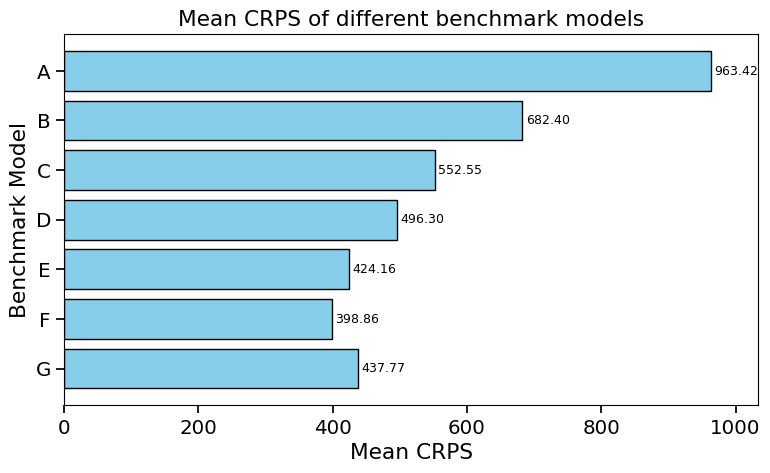

In [84]:
# Create horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(labels_splits, crps_splits_best_bm, color='skyblue', edgecolor='black')

# Add labels and title
plt.ylabel("Benchmark Model")  
plt.xlabel("Mean CRPS")
plt.title("Mean CRPS of different benchmark models")
plt.xlim(0, max(crps_splits_best_bm) + 70)  

# Show values on bars 
for i, v in enumerate(crps_splits_best_bm):
    plt.text(v + 5, i, f"{v:.2f}", va='center', fontsize=9)  

plt.tight_layout()
plt.gcf().savefig(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Abbildungen\(01a) Fahrraddaten_Benchmarking\splits_to_best_bm.png")
plt.show()

In [85]:
std_bike_count = df_train['bike_count'].std()
mean_bike_count = df_train['bike_count'].mean()

In [86]:
def calculate_pit(y_pred, y_true):
    sorted_preds = np.sort(y_pred)
    cdf_value = np.searchsorted(sorted_preds, y_true) / len(y_pred)
    return cdf_value

def calculate_residual(y_pred, y_true):
    residual = y_true - np.mean(y_pred)
    return residual

def calculate_standardized_residual(y_pred, y_true):
    residual = calculate_residual(y_pred, y_true)
    
    if np.std(y_pred) == 0:
        std = std_bike_count
    else:
        std = np.std(y_pred)
    
    std_residual = residual / std

    outlier = abs(std_residual) > 3
    return std_residual, outlier, residual, std, np.mean(y_pred)

def calculate_mean(y_pred):
    return np.mean(y_pred)

def calculate_mse(y_pred, y_true):
    return np.mean((y_true-y_pred) ** 2)

def calculate_std(y_pred):
    return np.std(y_pred)   

In [87]:
def prep_for_plots(df, mean_all, std_all):
    all_pit_values = []
    all_residuals = []
    all_standardized_residuals = []
    all_means = []
    y_test_all = []
    all_mse = []
    all_rmse = []
    all_std = []
    outliers = []
    outlier_data = []
    all_n_train_samples = []
    n_unused_training_sets = []
    outlier_std = []

    empty_test_sets = 0
    empty_training_sets = 0
    one_element_training_sets = 0
    number_sets = 0
    empty_test_and_training_sets = 0

    


    # Iterate over the list of [df_train, df_test] pairs
    for df_train1, df_test1 in df:
        number_sets += 1
        std = None

        y_train = df_train1['bike_count'].values  
        y_test = df_test1['bike_count'].values
    
        if y_test.size == 0:
            empty_test_sets += 1
            n_unused_training_sets.append(len(y_train))
            if y_train.size == 0:
                empty_test_and_training_sets += 1
        
            continue

        if y_train.size == 1:
            print("Single-element training set for test set: ")
            one_element_training_sets += 1
            print(df_test1['date'])
            std = [std_all for i in range(len(y_test))]
        elif y_train.size == 0:
            print("Empty training set for test set: ")
            empty_training_sets += 1
            print(df_test1['date'])

            y_train = np.array([mean_all])

        # calculate std
        if std is None:
            std = [calculate_std(y_train) for i in range(len(y_test))]
        all_std.extend(std)

        for i in range(len(y_test)):
            if std[i] > 1500:
                outlier_std.append({
                    'Standard_Deviation': std[i],
                    'True_Value': y_test[i],
                    'date': df_test1['date'].iloc[i],
                    'season': df_test1['season'].iloc[i],
                    'day_of_week': df_test1['day_of_week'].iloc[i],
                    'is_workday': df_test1['is_workday'].iloc[i],
                    'public_holiday': df_test1['public_holiday'].iloc[i],
                    'school_holiday': df_test1['school_holiday'].iloc[i],
                    'Number of Training Samples': len(y_train)
                })


        #for PIT
        # For each test sample, use the corresponding value from y_train as the prediction
        ensemble_predictions = np.tile(y_train, (len(df_test), 1))  # Replicate y_train as predictions for each test instance
        pit_values = [calculate_pit(ensemble_predictions[i, :], y_test[i]) for i in range(len(y_test))]
        all_pit_values.extend(pit_values)

        # for residual
        residuals = [calculate_residual(y_train, y_test[i]) for i in range(len(y_test))]
        all_residuals.extend(residuals)

        for i in range(len(y_test)):
            std_residual, is_outlier, residual, std, mean = calculate_standardized_residual(y_train, y_test[i])
            all_standardized_residuals.append(std_residual)
            outliers.append(is_outlier)
    
            if is_outlier:
                outlier_data.append({
                    'Standardized_Residual': std_residual,
                    'Residual': residual,
                    'True_Value': y_test[i],
                    'Predicted_Mean': mean,
                    'Standard_Deviation': std,
                    'date': df_test1['date'].iloc[i],
                    'season': df_test1['season'].iloc[i],
                    'day_of_week': df_test1['day_of_week'].iloc[i],
                    'is_workday': df_test1['is_workday'].iloc[i],
                    'public_holiday': df_test1['public_holiday'].iloc[i],
                    'school_holiday': df_test1['school_holiday'].iloc[i],
            
            
            
            'Number of Training Samples': len(y_train)
            })
            
        

        #for mean
        mean = [calculate_mean(y_train) for i in range(len(y_test))]
        all_means.extend(mean)

        y_test_all.extend(y_test)

        # Calculate the mean squared error
        mse =  [calculate_mse(mean, y_test[i]) for i in range(len(y_test))]
        all_mse.extend(mse)

        # Calculate the root mean squared error
        rmse = np.sqrt(mse)
        all_rmse.extend(rmse)

        all_n_train_samples.extend([len(y_train) for i in range(len(y_test))])
    
    outlier_df = pd.DataFrame(outlier_data)
    outlier_std_df = pd.DataFrame(outlier_std)
    print("Number of sets: ", number_sets)
    print("Number of empty test sets: ", empty_test_sets)
    print("Number of empty training sets: ", empty_training_sets)
    print("Number of single-element training sets: ", one_element_training_sets)
    print("Number of empty test and training sets: ", empty_test_and_training_sets)
    print("Number of unused training data samples: ", np.sum(n_unused_training_sets))
    print("Average number of training data samples: ", np.mean(all_n_train_samples))
    print("Shape of n_train_samples: ", np.array(all_n_train_samples).shape)

    return all_pit_values, all_residuals, all_standardized_residuals, all_means, y_test_all, all_mse, all_rmse, all_std, outlier_df, outlier_std_df

In [88]:
all_pit_values, all_residuals, all_standardized_residuals, all_means, y_test_all, all_mse, all_rmse, all_std, outlier_df, outlier_std_df = prep_for_plots(dfs_split_by_weekdays_season_and_rain_ph_schoolh, mean_bike_count, std_bike_count)

Single-element training set for test set: 
302   2023-10-30
Name: date, dtype: datetime64[ns]
Single-element training set for test set: 
365   2024-01-01
Name: date, dtype: datetime64[ns]
Empty training set for test set: 
304   2023-11-01
Name: date, dtype: datetime64[ns]
Single-element training set for test set: 
370   2024-01-06
Name: date, dtype: datetime64[ns]
Number of sets:  224
Number of empty test sets:  115
Number of empty training sets:  1
Number of single-element training sets:  3
Number of empty test and training sets:  55
Number of unused training data samples:  252
Average number of training data samples:  41.87435897435898
Shape of n_train_samples:  (390,)


In [89]:
len(df_train)

3525

In [90]:
outlier_std_df

,Standard_Deviation,True_Value,date,season,day_of_week,is_workday,public_holiday,school_holiday,Number of Training Samples
0,1947.650175,4411.0,2023-10-30,2,0,1,No Holiday,herbstferien,1
1,1947.650175,894.0,2024-01-01,3,0,0,Neujahr,weihnachtsferien,1
2,1947.650175,1300.0,2024-01-06,3,5,0,Heilige Drei Koenige,No Holiday,1


In [91]:
outlier_std_df.to_latex(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Daten\outlier_std_benchmark_df.tex", index=False)

In [92]:
outlier_df

,Standardized_Residual,Residual,True_Value,Predicted_Mean,Standard_Deviation,date,season,day_of_week,is_workday,public_holiday,school_holiday,Number of Training Samples
0,-5.372881,-158.500000,2144.0,2302.500000,29.500000,2023-10-03,2,1,0,Tag der Deutschen Einheit,No Holiday,2
1,6.315789,240.000000,671.0,431.000000,38.000000,2023-12-26,3,1,0,Weihnachten,weihnachtsferien,2
2,-3.025575,-591.500000,2165.0,2756.500000,195.500000,2023-06-08,1,3,0,Fronleichnam,pfingstferien,2
3,3.164286,443.000000,1322.0,879.000000,140.000000,2023-04-07,0,4,0,Karfreitag,No Holiday,2
4,8.799337,795.333333,1574.0,778.666667,90.385594,2023-01-06,3,4,0,Heilige Drei Koenige,weihnachtsferien,3
5,6.738430,627.000000,1160.0,533.000000,93.048375,2023-01-01,3,6,0,Neujahr,weihnachtsferien,3


In [93]:
outlier_df.to_latex(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Daten\outlier_benchmark_df.tex", index=False)

In [94]:
mean_rmse = np.mean(all_rmse)
mean_std = np.mean(all_std)

spread_skill_ratio = mean_std / mean_rmse

In [95]:
print(f'Mean MSE: {np.mean(all_mse)}')
print(f'Mean RMSE: {np.mean(all_rmse)}')
print(f'Mean Residuals: {np.mean(all_residuals)}')
print(f'Mean Standardized Residuals: {np.mean(all_standardized_residuals)}')
print(f'Mean PIT: {np.mean(all_pit_values)}')
print(f'Spread Skill Ratio: {spread_skill_ratio}')

Mean MSE: 476217.85291900573
Mean RMSE: 515.773355283116
Mean Residuals: -175.5974388915886
Mean Standardized Residuals: -0.12939587668862143
Mean PIT: 0.43476440540134237
Spread Skill Ratio: 1.6454509600091998


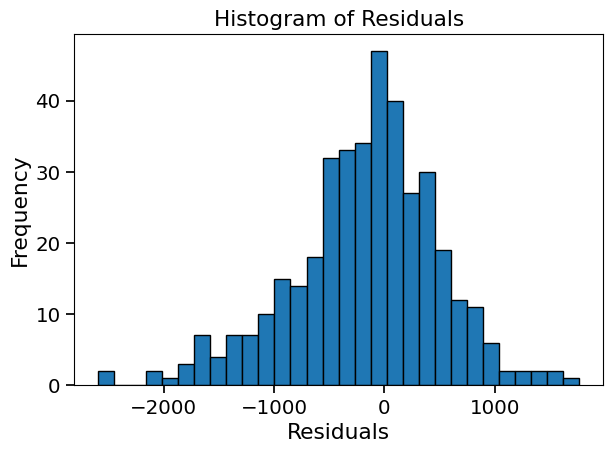

In [96]:
plt.hist(all_residuals, bins=30, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.gcf().savefig(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Abbildungen\(01a) Fahrraddaten_Benchmarking\residuals_hist.png")
plt.show()

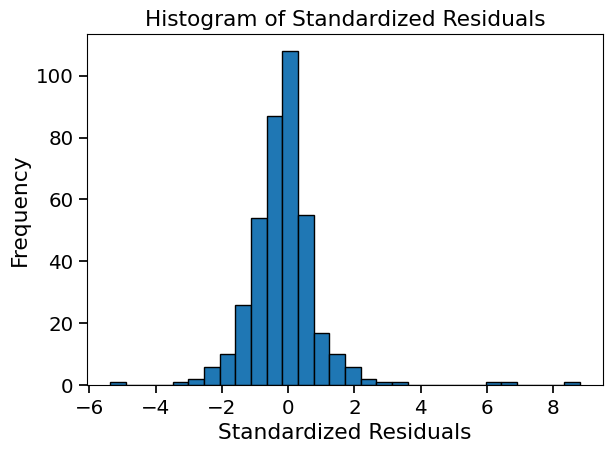

In [97]:
residuals_histogramm = plt.hist(all_standardized_residuals, bins=30, edgecolor='k')
plt.title("Histogram of Standardized Residuals")
plt.xlabel("Standardized Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.gcf().savefig(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Abbildungen\(01a) Fahrraddaten_Benchmarking\standardized_residuals_hist.png")
plt.show()
plt.close()

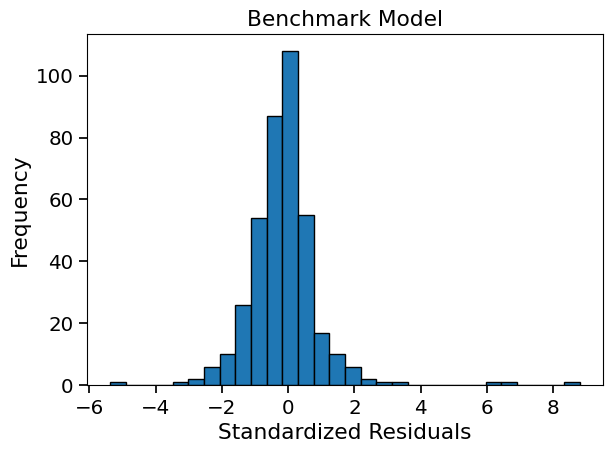

In [98]:
residuals_histogramm = plt.hist(all_standardized_residuals, bins=30, edgecolor='k')
plt.title("Benchmark Model")
plt.xlabel("Standardized Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.gcf().savefig(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Abbildungen\(01a) Fahrraddaten_Benchmarking\standardized_residuals_hist_benchmark.png")
plt.show()
plt.close()

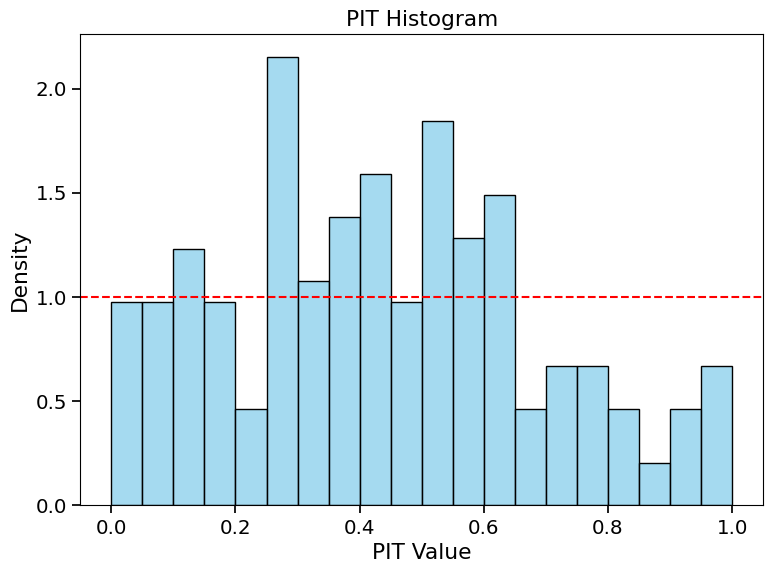

In [99]:
plt.figure(figsize=(8, 6))
sns.histplot(all_pit_values, bins=20, kde=False, stat='density', edgecolor='k', color='skyblue')
plt.axhline(1, color='red', linestyle='--', linewidth=1.5, label='Density = 1') 

plt.title('PIT Histogram')
plt.xlabel('PIT Value')
plt.ylabel('Density')
plt.tight_layout()
plt.gcf().savefig(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Abbildungen\(01a) Fahrraddaten_Benchmarking\pit_histogram.png")
plt.show()

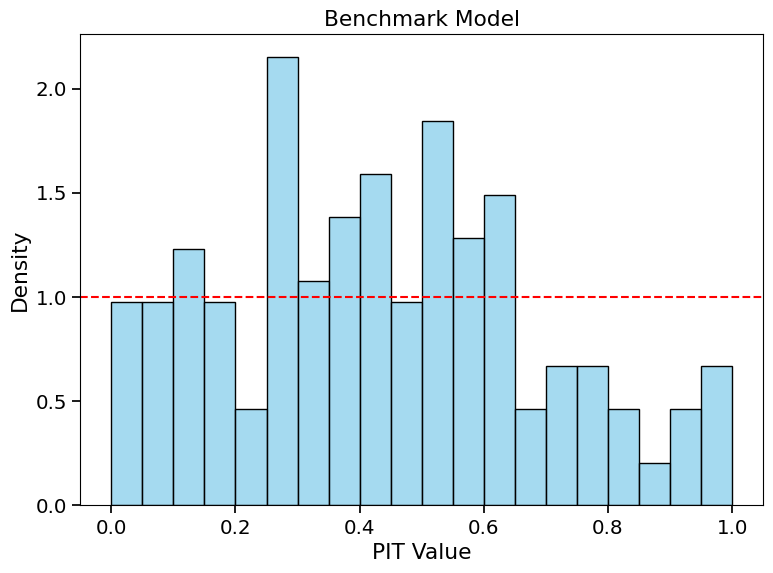

In [100]:
plt.figure(figsize=(8, 6))
sns.histplot(all_pit_values, bins=20, kde=False, stat='density', edgecolor='k', color='skyblue')
plt.axhline(1, color='red', linestyle='--', linewidth=1.5, label='Density = 1') 

plt.title('Benchmark Model')
plt.xlabel('PIT Value')
plt.ylabel('Density')
plt.tight_layout()
plt.gcf().savefig(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Abbildungen\(01a) Fahrraddaten_Benchmarking\pit_histogram_benchmark.png")
plt.show()

p-value: 0.03368473673767037


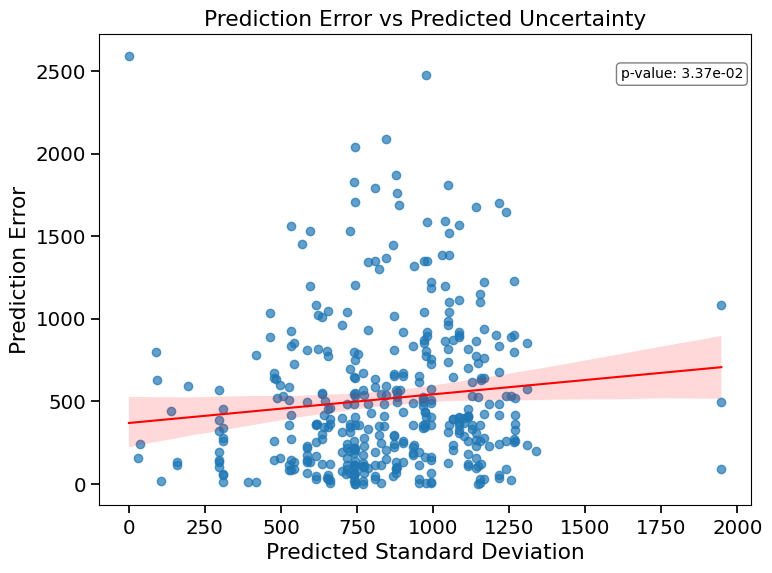

In [101]:
errors = np.abs(all_residuals)

plt.figure(figsize=(8, 6))
# Scatter plot
plt.scatter(all_std, errors, alpha=0.7)
plt.xlabel("Predicted Standard Deviation")
plt.ylabel("Prediction Error")
plt.title("Prediction Error vs Predicted Uncertainty")

sns.regplot( x=all_std, y=errors, scatter=False, color='red')

# Calculate the p-value for the regression
slope, intercept, r_value, p_value, std_err = stats.linregress(all_std, errors)
print(f'p-value: {p_value}')
# Add the p-value to the plot
plt.text(0.8, 0.93, f'p-value: {p_value:.2e}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


plt.tight_layout()
plt.gcf().savefig(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Abbildungen\(01a) Fahrraddaten_Benchmarking\uncertainty_error_scatter.png")
# Show plot
plt.show()

p-value: 0.03368473673767037


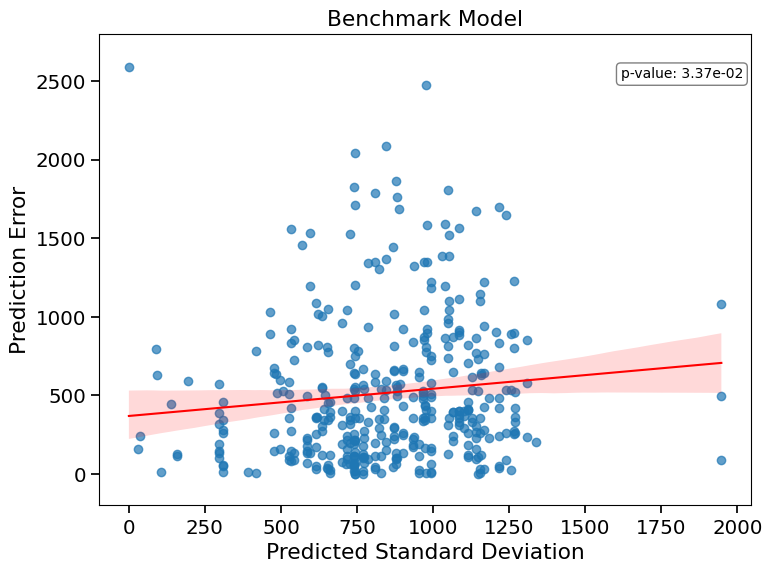

In [117]:
errors = np.abs(all_residuals)

plt.figure(figsize=(8, 6))
# Scatter plot
plt.scatter(all_std, errors, alpha=0.7)
plt.xlabel("Predicted Standard Deviation")
plt.ylabel("Prediction Error")
plt.title("Benchmark Model")
plt.ylim(-200, 2800)

sns.regplot( x=all_std, y=errors, scatter=False, color='red')

# Calculate the p-value for the regression
slope, intercept, r_value, p_value, std_err = stats.linregress(all_std, errors)
print(f'p-value: {p_value}')
# Add the p-value to the plot
plt.text(0.8, 0.93, f'p-value: {p_value:.2e}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


plt.tight_layout()
plt.gcf().savefig(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Abbildungen\(01a) Fahrraddaten_Benchmarking\uncertainty_error_scatter_benchmark.png")
# Show plot
plt.show()

In [102]:
# Calculate prediction intervals (95% confidence interval)
lower_bound = np.array(all_means) - 1.96 * np.array(all_std)
upper_bound = np.array(all_means) + 1.96 * np.array(all_std)

# Check how many actual values fall within the prediction interval
coverage = np.mean((y_test_all >= lower_bound) & (y_test_all <= upper_bound))

print(f"PICP (Prediction Interval Coverage Probability): {coverage:.2f}")

#picp represents the percentage of actual values that fall within the prediction interval
# 95 percent of true values fall within 95% of the prediction interval

PICP (Prediction Interval Coverage Probability): 0.95


In [103]:
all_means = np.array(all_means)
print(all_means.shape)

(390,)


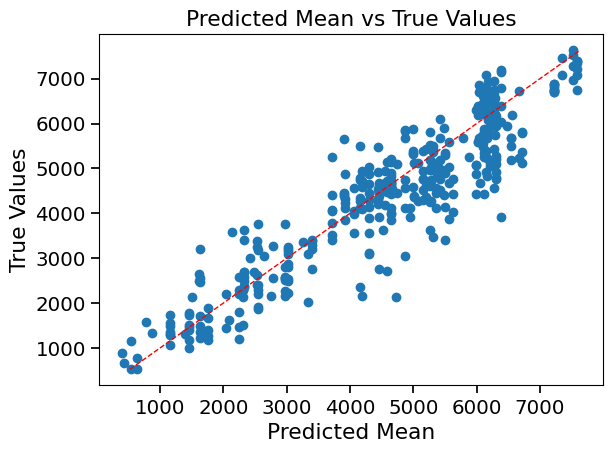

In [104]:
# Scatter plot
plt.scatter(all_means, y_test_all)
plt.plot([min(y_test_all), max(y_test_all)], [min(y_test_all), max(y_test_all)], color='red', linestyle='--')
plt.title("Predicted Mean vs True Values")
plt.xlabel("Predicted Mean")
plt.ylabel("True Values")

plt.tight_layout()  
plt.gcf().savefig(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Abbildungen\(01a) Fahrraddaten_Benchmarking\predicted_mean_vs_true_values.png")
plt.show()

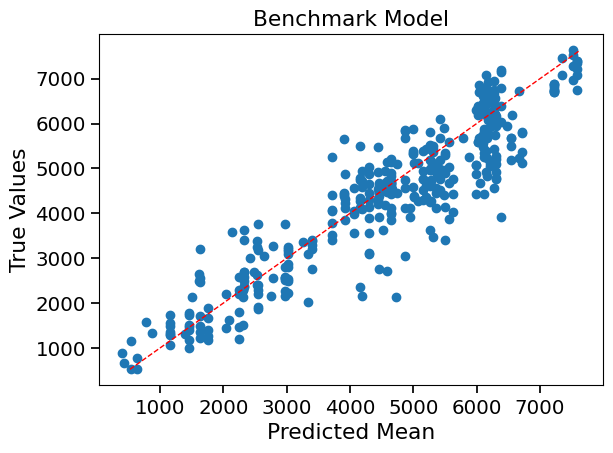

In [105]:
# Scatter plot
plt.scatter(all_means, y_test_all)
plt.plot([min(y_test_all), max(y_test_all)], [min(y_test_all), max(y_test_all)], color='red', linestyle='--')
plt.title("Benchmark Model")
plt.xlabel("Predicted Mean")
plt.ylabel("True Values")

plt.tight_layout()  
plt.gcf().savefig(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Abbildungen\(01a) Fahrraddaten_Benchmarking\predicted_mean_vs_true_values_benchmark.png")
plt.show()

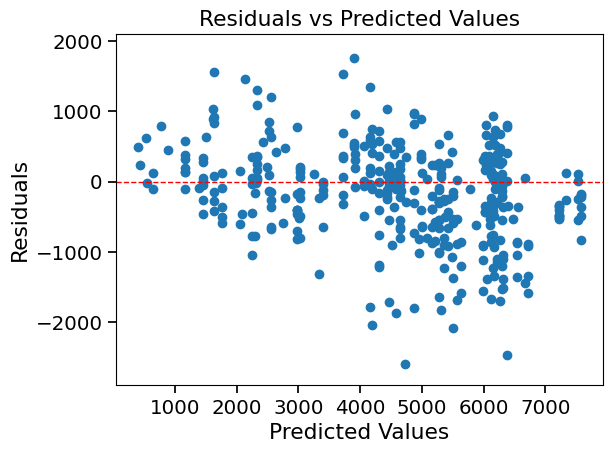

In [106]:

res_vs_pred_plot = plt.scatter(all_means, all_residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontale Linie bei 0
plt.ylim(-2900, 2100)

plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.gcf().savefig(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Abbildungen\(01a) Fahrraddaten_Benchmarking\residuals_vs_predicted_values.png")
plt.show()

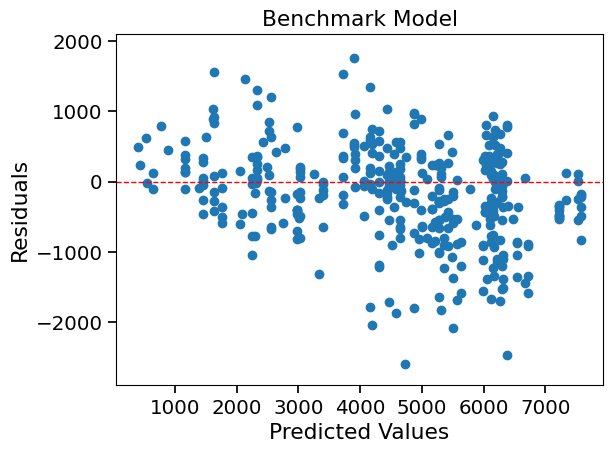

In [107]:

res_vs_pred_plot = plt.scatter(all_means, all_residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontale Linie bei 0
plt.ylim(-2900, 2100)

plt.title("Benchmark Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.gcf().savefig(r"C:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Abbildungen\(01a) Fahrraddaten_Benchmarking\residuals_vs_predicted_values_benchmark.png")
plt.show()

In [108]:
all_pit_values1, all_residuals1, all_standardized_residuals1, all_means1, y_test_all1, all_mse1, all_rmse1, all_std1, outlier_df1, outlier_std_df1 = prep_for_plots(dfs_split_by_weekdays_season_and_rain_ph, mean_bike_count, std_bike_count)

Single-element training set for test set: 
304   2023-11-01
Name: date, dtype: datetime64[ns]
Number of sets:  112
Number of empty test sets:  43
Number of empty training sets:  0
Number of single-element training sets:  1
Number of empty test and training sets:  13
Number of unused training data samples:  64
Average number of training data samples:  60.756410256410255
Shape of n_train_samples:  (390,)


In [109]:
all_pit_values2, all_residuals2, all_standardized_residuals2, all_means2, y_test_all2, all_mse2, all_rmse2, all_std2, outlier_df2, outlier_std_df2 = prep_for_plots(dfs_split_by_weekdays_season_and_rain_ph_schoolh_windspeed, mean_bike_count, std_bike_count)

Single-element training set for test set: 
99   2023-04-10
Name: date, dtype: datetime64[ns]
Single-element training set for test set: 
148   2023-05-29
Name: date, dtype: datetime64[ns]
Single-element training set for test set: 
302   2023-10-30
Name: date, dtype: datetime64[ns]
Single-element training set for test set: 
358   2023-12-25
Name: date, dtype: datetime64[ns]
Empty training set for test set: 
365   2024-01-01
Name: date, dtype: datetime64[ns]
Single-element training set for test set: 
275   2023-10-03
Name: date, dtype: datetime64[ns]
Single-element training set for test set: 
303   2023-10-31
Name: date, dtype: datetime64[ns]
Single-element training set for test set: 
359   2023-12-26
Name: date, dtype: datetime64[ns]
Single-element training set for test set: 
366   2024-01-02
Name: date, dtype: datetime64[ns]
Single-element training set for test set: 
102   2023-04-13
Name: date, dtype: datetime64[ns]
Single-element training set for test set: 
158   2023-06-08
Name: date

In [110]:
all_pit_values3, all_residuals3, all_standardized_residuals3, all_means3, y_test_all3, all_mse3, all_rmse3, all_std3, outlier_df3, outlier_std_df3 = prep_for_plots(dfs_split_by_weekdays_season_rain_schoolh, mean_bike_count, std_bike_count)

Single-element training set for test set: 
302   2023-10-30
Name: date, dtype: datetime64[ns]
Number of sets:  112
Number of empty test sets:  13
Number of empty training sets:  0
Number of single-element training sets:  1
Number of empty test and training sets:  0
Number of unused training data samples:  166
Average number of training data samples:  43.84102564102564
Shape of n_train_samples:  (390,)


In [111]:
all_pit_values4, all_residuals4, all_standardized_residuals4, all_means4, y_test_all4, all_mse4, all_rmse4, all_std4, outlier_df4, outlier_std_df4 = prep_for_plots(dfs_split_by_weekdays_season_and_rain, mean_bike_count, std_bike_count)

Number of sets:  56
Number of empty test sets:  0
Number of empty training sets:  0
Number of single-element training sets:  0
Number of empty test and training sets:  0
Number of unused training data samples:  0.0
Average number of training data samples:  64.73846153846154
Shape of n_train_samples:  (390,)


In [112]:
all_pit_values5, all_residuals5, all_standardized_residuals5, all_means5, y_test_all5, all_mse5, all_rmse5, all_std5, outlier_df5, outlier_std_df5 = prep_for_plots(dfs_split_by_weekdays, mean_bike_count, std_bike_count)

Number of sets:  7
Number of empty test sets:  0
Number of empty training sets:  0
Number of single-element training sets:  0
Number of empty test and training sets:  0
Number of unused training data samples:  0.0
Average number of training data samples:  503.56666666666666
Shape of n_train_samples:  (390,)


In [113]:
all_pit_values6, all_residuals6, all_standardized_residuals6, all_means6, y_test_all6, all_mse6, all_rmse6, all_std6, outlier_df6, outlier_std_df6 = prep_for_plots(dfs_split_by_weekdays_and_seasons, mean_bike_count, std_bike_count)

Number of sets:  28
Number of empty test sets:  0
Number of empty training sets:  0
Number of single-element training sets:  0
Number of empty test and training sets:  0
Number of unused training data samples:  0.0
Average number of training data samples:  125.55128205128206
Shape of n_train_samples:  (390,)
